# P2: Investigate a Dataset (tmdb.csv)

# Introduction

#Data Overview
        -In the tmdb.csv contains information about 10,000 movies, in which including user ratings and revenue.
        
#Questions:

        1.Which movies had highest and lowest budgets?
        2.Average runtime of all the movies
        3.Movies with most and least earned revenue.
        4.Movies with longest and shortest runtime values.
        5.Year of release vs revenue earned.
        
        Whit respect to Revenue earn by movies.
        6. Successful genres
        7. Most frequent cast
        8. Average Budget
        9. Average Duration
        10.Year of release
        

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

# Data wrangling

After observing the dataset and questions for analysis we are keeping only important data and deleting unused data so we can make our calculation easy and uderstandable.

In [2]:
tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


# Obsevations from the data set

1. Some missing value in budeget and revenue column are zero.
2. No standar unit for currency is used in this dataset So, i am assuming the currency unit is dollar.

In [3]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
tmdb_data.shape

(10866, 21)

In [5]:
tmdb_data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
tmdb_data.isna()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

1. Check for missing data

In [8]:
tmdb_data.columns[tmdb_data.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

Based on the question, observation and the missing data i am going to remove the unued data such as id, imdb_id, homepage, production_companies, key words, homepage.

In [9]:
#creating a list of columb to be deleted
del_col=['id', 'imdb_id','homepage', 'keywords', 'overview', 'production_companies']

#deleting the columns
tmdb_data= tmdb_data.drop(del_col,1)

#previewing the new dataset
tmdb_data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


# 2. Remove duplicates

In [10]:
tmdb_data.drop_duplicates(inplace=True)
sum(tmdb_data.duplicated())

0

In [11]:
tmdb_data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


# manipulating

In [12]:
sep_list=['budget', 'revenue']
tmdb_data[sep_list] = tmdb_data[sep_list].replace(0, np.NAN)
tmdb_data.dropna(subset = sep_list, inplace = True)
rows, col = tmdb_data.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


# 4. Changing the release date column into standard date format

In [13]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08


# 5.Replacing zero with nan in runtime column

In [14]:
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)

# Exploratory Data Analysis

1. Which movies had highest and lowest budgets?

In [15]:
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
calculate('budget')

,2244,2618
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


2. Average runtime of all the movies

In [16]:
def avg_fun(column):
    return tmdb_data[column].mean()
avg_fun('runtime')

109.22029060716139

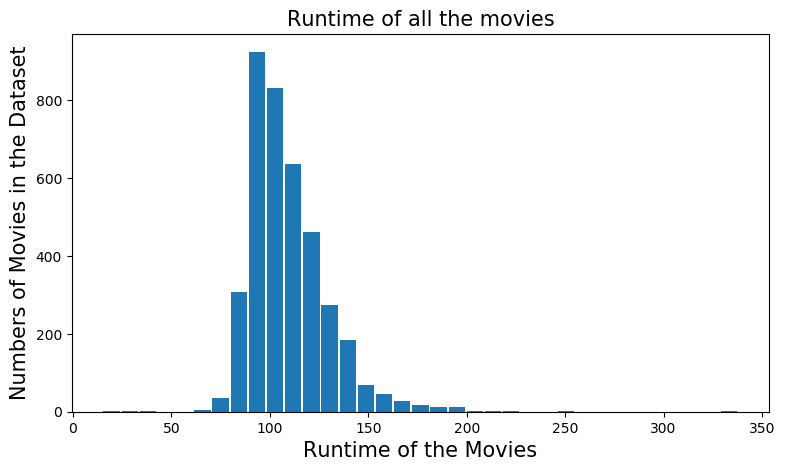

In [17]:
#plotting a histogram of runtime of movies
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime of the Movies', fontsize = 15) 
plt.ylabel('Numbers of Movies in the Dataset', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins =35)
plt.show()

In this histogram is showing positively right skewed. Most of the movies runtime are between 90 to 140.  Almost 6,000 and more no.of movies fall in this criteria.

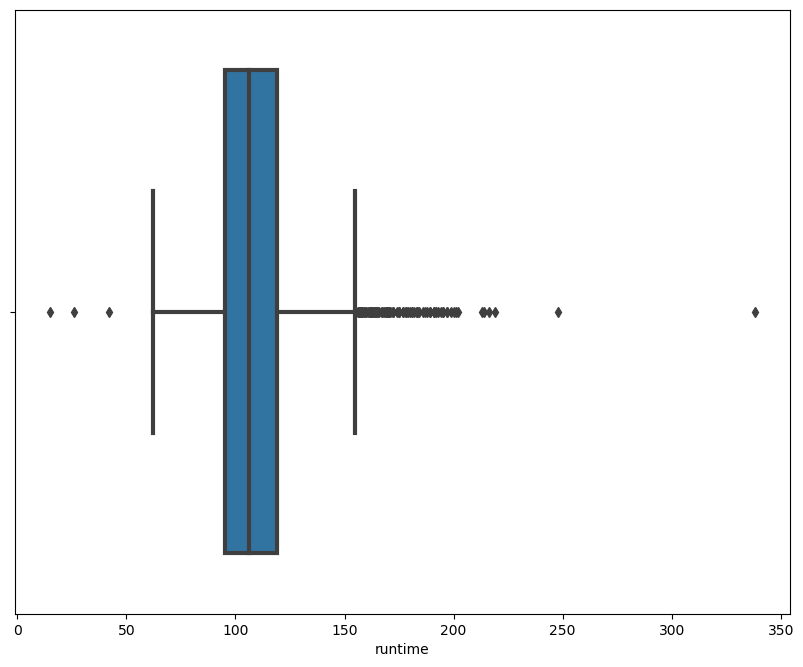

In [18]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi = 100)
#using seaborn to generate the boxplot
sns.boxplot(tmdb_data['runtime'], linewidth = 3)
plt.show()

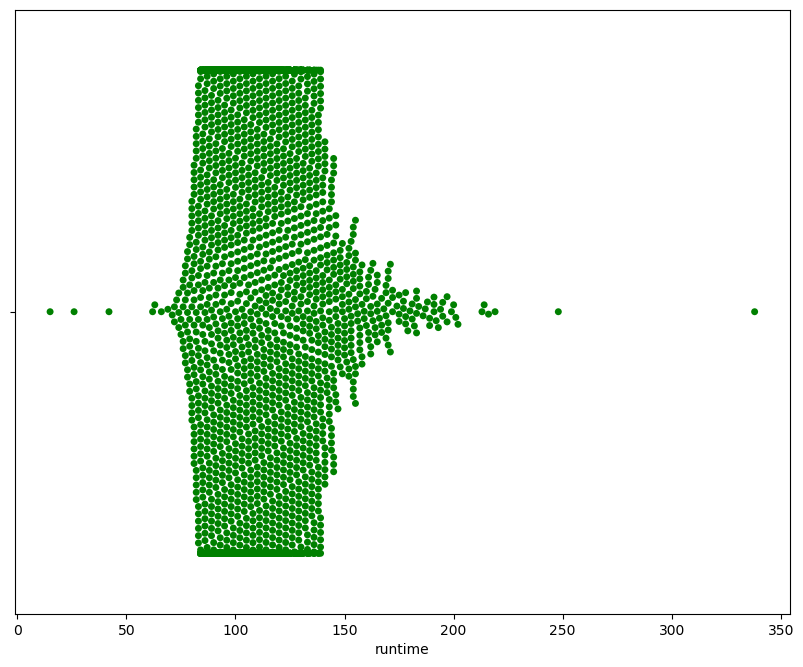

In [33]:
plt.figure(figsize=(10,8), dpi = 100)
sns.swarmplot(tmdb_data['runtime'], color = 'green')
plt.show()

In [19]:
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

3. Movies with most and least earned revenue.

In [20]:
#defining the function
def calculate(column):
    #for highest earned profit
    high= tmdb_data[column].idxmax()
    high_details=pd.DataFrame(tmdb_data.loc[high])
    
    #for lowest earned profit
    low= tmdb_data[column].idxmin()
    low_details=pd.DataFrame(tmdb_data.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
calculate('revenue')

,1386,5067
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


4. Movies with longest and shortest runtime values.

In [21]:
calculate('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


5. Year of release vs revenue earned.

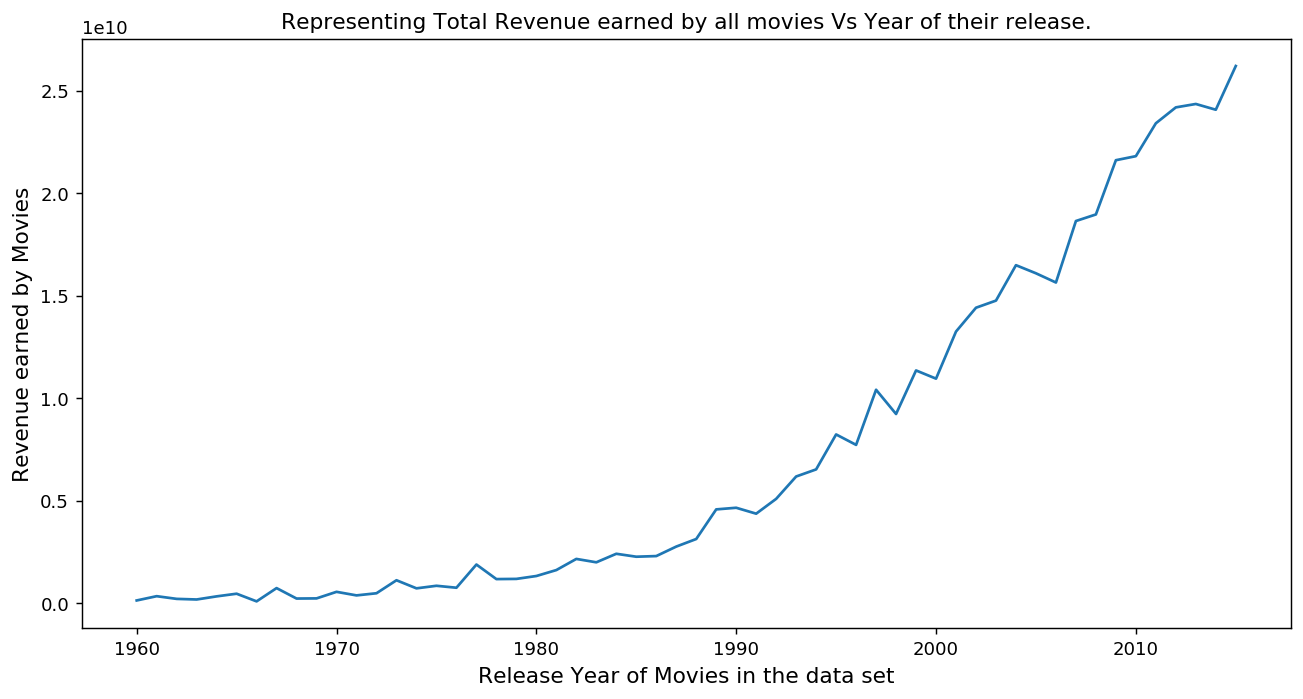

In [22]:
revenue_year = tmdb_data.groupby('release_year')['revenue'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Revenue earned by Movies', fontsize = 12)
plt.title('Representing Total Revenue earned by all movies Vs Year of their release.')
plt.plot(revenue_year)
plt.show()

In [23]:
revenue_year.idxmax()

2015

# What when we fix the revenue earn by movies is $ 50M

In [24]:
revenue_data = tmdb_data[tmdb_data['revenue'] >= 50000000]
revenue_data.index = range(len(revenue_data))
revenue_data.index = revenue_data.index + 1
revenue_data.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
2,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
3,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08


In [25]:
len(revenue_data)# no of rows

1836

So dataset is reduced to 1836 from 3853.

# Part 2

6. Succesful Genres

In [26]:
def data(column):
    data = revenue_data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count
count = data('genres')
count.head()

Drama        693
Comedy       660
Action       642
Thriller     572
Adventure    505
dtype: int64

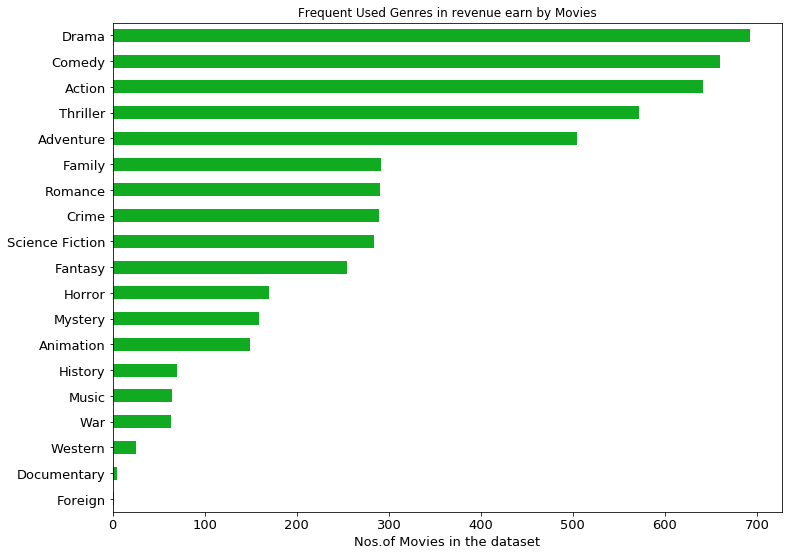

In [40]:
count.sort_values(ascending = True, inplace = True)
lt = count.plot.barh(color = '#10ab21', fontsize = 13)
lt.set(title = 'Frequent Used Genres in revenue earn by Movies')
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')
lt.figure.set_size_inches(12, 9)
plt.show()

7. Most Frequent Cast

In [27]:
count = data('cast')
count.head()

Bruce Willis      32
Tom Cruise        30
Tom Hanks         28
Robert De Niro    28
Brad Pitt         27
dtype: int64

8. Average budget

In [28]:
def revenue_avg(column):
    return revenue_data[column].mean()
revenue_avg('budget')

58559101.38344227

9. Average duration

In [29]:
revenue_avg('runtime')

113.12581699346406

10. Movies popularity

In [30]:
def revenue_avg(column):
    return revenue_data[column].mean()
revenue_avg('release_year')

2002.6252723311547

# Conclusions

1. Average budget must be around $60 millon.
2. Average duration should be 113 minutes.
3. Genre should be Drama, Comedy, Action, Thriller, Adventure.
4. Most Frequent Cast are Bruce Willis, Tom Cruise, Robert De Niro, Tom Hanks, Brad Pitt.

These are some factor through which movies earn more revenue and average revenue $2002 million dollar by release years.

# Limitations:

The data anaysis process  was done which had significant amount of revenue earn is around $50 million on various runtime, budget, genres. But In this dataset i observe that the profit column is missing so we can not analysis on the various fector which lead to profiable movies. And Currency unit is not there so it might be some possibility to miss match in the results.